In [1]:
import torch
from torchvision.io import read_image
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt
from forest_roads_extractor import ForestRoadsExtractor

import osmnx as ox

In [2]:
image_name = 'report_image.jpg'
image = read_image(image_name)

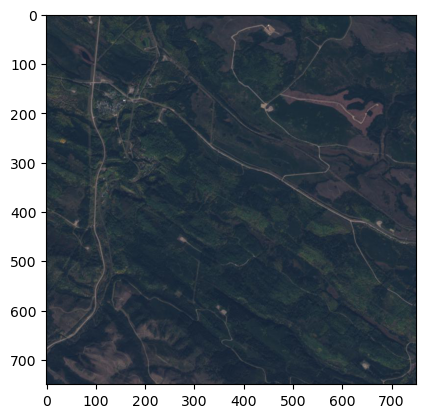

In [3]:
plt.imshow(image.permute(1, 2, 0))

In [4]:
forest_road_extractor = ForestRoadsExtractor(model_name='unet', model_path='../models/unet/unet_exp/unet_state_dict')

In [5]:
mask = forest_road_extractor.get_raw_roads(image_name)

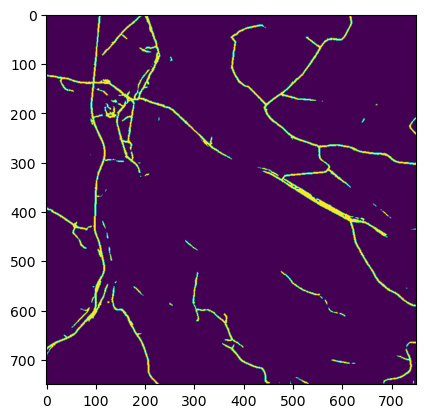

In [6]:
plt.imshow(mask)

In [7]:
mask, inds_coords, graph = forest_road_extractor.get_processed_roads(mask)

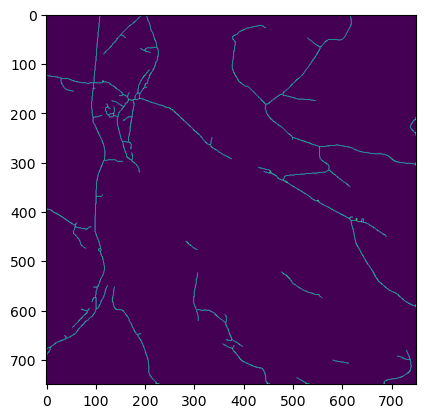

In [8]:
plt.imshow(mask)

In [9]:
coords = [(53.24962646775486, -117.000305),
          (53.248851201797216, -116.88792487704917),
          (53.18142768480264, -116.88792385245901),
          (53.182202950760285, -117.00030397540984)]
osm_file_path = './report_graph.osm'

forest_road_extractor.get_osm_map(mask, inds_coords, graph, coords, osm_file_path)

In [10]:
# forest_road_extractor.build_osm_map(image_name, coords, osm_file_path)

In [11]:
G = ox.graph.graph_from_xml(osm_file_path, simplify=False, retain_all=True)
nodes, edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True)

In [12]:
nodes

y           x                     geometry
osmid                                                    
0      53.249516 -116.984272  POINT (-116.98427 53.24952)
1      53.249515 -116.984122  POINT (-116.98412 53.24951)
2      53.249514 -116.983972  POINT (-116.98397 53.24951)
25     53.249424 -116.983972  POINT (-116.98397 53.24942)
3      53.249513 -116.983823  POINT (-116.98382 53.24951)
...          ...         ...                          ...
5814   53.181744 -116.920739  POINT (-116.92074 53.18174)
5815   53.181743 -116.920589  POINT (-116.92059 53.18174)
5816   53.181742 -116.920439  POINT (-116.92044 53.18174)
5817   53.181586 -116.897813  POINT (-116.89781 53.18159)
5819   53.181584 -116.897514  POINT (-116.89751 53.18158)

[5563 rows x 3 columns]

In [13]:
edges

osmid  reversed  length  \
u    v    key                            
0    1    0        0     False   9.970   
1    2    0        1     False   9.970   
2    25   0        2     False   9.996   
     3    0        3     False   9.970   
25   29   0        4     False   9.996   
...              ...       ...     ...   
5812 5813 0     5557     False   9.986   
5813 5814 0     5558     False   9.986   
5814 5815 0     5559     False   9.986   
5815 5816 0     5560     False   9.986   
5817 5818 0     5561     False   9.986   

                                                        geometry  
u    v    key                                                     
0    1    0    LINESTRING (-116.98427 53.24952, -116.98412 53...  
1    2    0    LINESTRING (-116.98412 53.24951, -116.98397 53...  
2    25   0    LINESTRING (-116.98397 53.24951, -116.98397 53...  
     3    0    LINESTRING (-116.98397 53.24951, -116.98382 53...  
25   29   0    LINESTRING (-116.98397 53.24942, -116.98397 53...  
...                                                          ...  
5812 5813 0    LINESTRING (-116.92104 53.18175, -116.92089 53...  
5813 5814 0    LINESTRING (-116.92089 53.18174, -116.92074 53...  
5814 5815 0    LINESTRING (-116.92074 53.18174, -116.92059 53...  
5815 5816 0    LINESTRING (-116.92059 53.18174, -116.92044 53...  
5817 5818 0    LINESTRING (-116.89781 53.18159, -116.89766 53...  

[5562 rows x 4 columns]

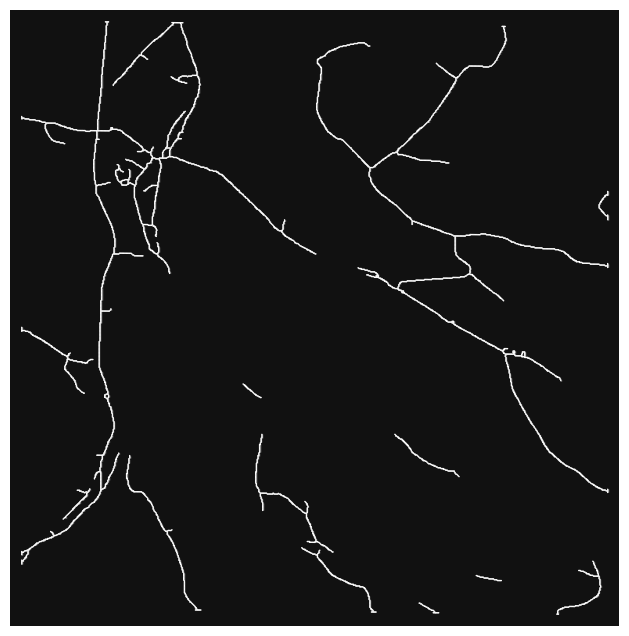

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [14]:
ox.plot.plot_graph(G, node_size=1)

In [15]:
ox.folium.plot_graph_folium(G)